# KnowLow = No Low
## DirecNetExercise2Study - Effect of exercise per se on the risk of nocturnal hypoglycemia
### Attempts to evaluate the most effective methods of adjusting insulin doses during exercise in order to maximize the benefits and safety of exercise in children with T1DM by preventing hypoglycemia during and following exercise.

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [110]:
df_cgms = pd.read_csv('DataTables/tblGDataCGMS.csv', sep=',', header=None)
df_cgms.columns = df_cgms.iloc[0]
# Use first row info as header
df_cgms.drop(df_cgms.index[0], inplace=True)
# Drop first row

df_cgms['ReadingTm'] = pd.to_datetime(df_cgms['ReadingTm']).dt.strftime('%H:%M:%S')
# To get rid of some PM inputs
df_cgms['ReadingValue'] = pd.to_numeric(df_cgms['SensorGLU'])
df_cgms['MeterBG'] = pd.to_numeric(df_cgms['MeterBG'])

df_cgms.set_index('ReadingTm', inplace=True)
gpd_cgms = df_cgms.groupby(['PtID', 'ReadingDt'])
#df_cgms = df_cgms.groupby('GVisitType')
#gpd_cgms.head()

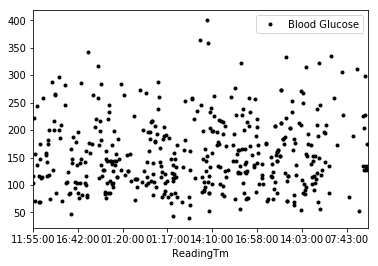

In [112]:
ax = df_cgms.plot(y="MeterBG",style='k.',label='Blood Glucose')
#fig, ax = plt.subplots(figsize=(8,6))
#bp = df_cgms.groupby('PtID').plot(y='SensorGLU',kind='kde', ax=ax)

In [94]:
df_free = pd.read_csv('DataTables/tblGDataFreestyle.csv', sep=',', header=None)
df_free.columns = df_free.iloc[0]
# Use first row info as header
df_free.drop(df_free.index[0], inplace=True)
# Drop first row

df_free['ReadingDtTm'] = pd.to_datetime(df_free['ReadingDtTm'])
df_free['ReadingValue'] = pd.to_numeric(df_free['ReadingValue'])

df_free = df_free.drop(['RecID','BGType','ReadingType'], axis=1)
# drop unnecessary columns

df_free = df_free.groupby(['PtID', 'ReadingDtTm', 'GFreeSampleType'])
df_free.head()

,PtID,GVisitType,GFreeSampleType,ReadingDtTm,ReadingValue
1,14,Basal continued,Additional,2000-01-01 11:16:00,73
2,14,Basal continued,Additional,2000-01-01 11:32:00,75
3,14,Basal continued,Additional,2000-01-01 12:18:00,75
4,14,Basal continued,1PM,2000-01-01 13:00:00,68
5,14,Basal continued,2PM,2000-01-01 14:01:00,48
6,14,Basal continued,Additional,2000-01-01 14:16:00,59
7,14,Basal continued,Additional,2000-01-01 14:31:00,88
8,14,Basal continued,3PM,2000-01-01 15:00:00,166
9,14,Basal continued,Additional,2000-01-01 16:01:00,203
10,14,Basal continued,Additional,2000-01-01 16:13:00,218


In [74]:
df_snack = pd.read_csv('DataTables/tblGSnackData.csv', sep=',', header=None)
df_snack.columns = df_snack.iloc[0]
# Use first row info as header
df_snack.drop(df_snack.index[0], inplace=True)
# Drop first row

df_snack['CarbDtTm'] = pd.to_datetime(df_snack['CarbDtTm'])#.dt.strftime('%H:%M:%S')
df_snack.head()
#df_free = df_free.groupby('PtID')

,RecID,PtID,CarbDtTm,BedtimeSnack,GmCarbs,TxHypo,Dinner,GSnackSource
1,352,3,2000-04-02 18:05:00,False,57,False,True,Clinic
2,490,3,2000-04-18 18:10:00,False,57,False,True,Clinic
3,289,3,2000-04-02 17:49:00,False,15,False,False,Clinic
4,290,3,2000-04-02 21:22:00,True,NaN,False,False,Subject
5,291,3,2000-04-03 00:09:00,False,12,True,False,Subject


In [68]:
patients_cgms = np.sort(np.unique(df_cgms['PtID'].astype(int)))
print(patients_cgms), len(patients_cgms)

patients_free = np.sort(np.unique(df_free['PtID'].astype(int)))
print(patients_free), len(patients_free)

patients_snack = np.sort(np.unique(df_snack['PtID'].astype(int)))
print(patients_snack), len(patients_snack)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52
 53 54 55 56 57]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52
 53 54 55 56 57]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52 53 54
 55 56 57]


(None, 53)